In [121]:
print("""This project was designed primarily for the practical application and exploration of selected machine learning techniques,
rather than focusing on achieving the highest possible prediction accuracy. The main emphasis was placed on:

    Data Dimensionality Reduction:
        Application of dimensionality reduction techniques, such as PCA, to reduce the number of features in the dataset.
        Experimentation with various parameters and evaluation of the impact of reduction on model performance.
    Classifier Usage:
        Implementation and comparison of various classification algorithms, such as logistic regression, random forests, and others.
        Analysis of their advantages and disadvantages in the context of the given dataset.
    Model Hyperparameter Tuning:
        Practical application of hyperparameter tuning techniques, such as Grid Search and Random Search.
        Evaluation of the impact of tuning on model performance and understanding the significance of individual hyperparameters.
    Practical Data Utilization:
        An important element of the project was the practical utilization of data and familiarization with the 
        process of data processing and preparation.

The project's premise was to acquire practical skills in machine learning, rather than optimizing model evaluation metrics. 
This made the project a valuable experience in applying dimensionality reduction, classification, and hyperparameter tuning techniques.""")

This project was designed primarily for the practical application and exploration of selected machine learning techniques,
rather than focusing on achieving the highest possible prediction accuracy. The main emphasis was placed on:

    Data Dimensionality Reduction:
        Application of dimensionality reduction techniques, such as PCA, to reduce the number of features in the dataset.
        Experimentation with various parameters and evaluation of the impact of reduction on model performance.
    Classifier Usage:
        Implementation and comparison of various classification algorithms, such as logistic regression, random forests, and others.
        Analysis of their advantages and disadvantages in the context of the given dataset.
    Model Hyperparameter Tuning:
        Practical application of hyperparameter tuning techniques, such as Grid Search and Random Search.
        Evaluation of the impact of tuning on model performance and understanding the significance of individual

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_raw = pd.read_csv("C:\\Users\\rochm\\Desktop\\heart_disease_uci.csv")
df_raw.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df = df_raw.copy()

In [5]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
df.drop('id', axis = 1, inplace = True)
df.drop('dataset', axis = 1, inplace = True)

In [7]:
from sklearn.impute import SimpleImputer

miss_values = []

for col in df.columns:
    if df[col].isnull().sum() > 0 and df[col].dtype == 'object':
        miss_values.append(col)

print(miss_values)

['fbs', 'restecg', 'exang', 'slope', 'thal']


In [8]:
for col in miss_values:
    print(df[col].value_counts(),'\n', f'sum of NaN: {df[col].isnull().sum()}', '\n\n')

fbs
False    692
True     138
Name: count, dtype: int64 
 sum of NaN: 90 


restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64 
 sum of NaN: 2 


exang
False    528
True     337
Name: count, dtype: int64 
 sum of NaN: 55 


slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64 
 sum of NaN: 309 


thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64 
 sum of NaN: 486 




In [9]:
df.drop('thal', axis = 1, inplace = True)
df.drop('ca', axis = 1, inplace = True)

In [10]:
for col in miss_values[0:4]:
    print(df[col].value_counts(),'\n', f'sum of NaN: {df[col].isnull().sum()}', '\n\n')

fbs
False    692
True     138
Name: count, dtype: int64 
 sum of NaN: 90 


restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64 
 sum of NaN: 2 


exang
False    528
True     337
Name: count, dtype: int64 
 sum of NaN: 55 


slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64 
 sum of NaN: 309 




In [11]:
sc = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df[miss_values[0:3]] = sc.fit_transform(df[miss_values[0:3]])

In [12]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope       309
num           0
dtype: int64

In [13]:
miss_value_number = []

for col in df.columns:
    if (df[col].dtype == 'int64' or df[col].dtype == 'float64') and col != 'ca' and col != 'num' and df[col].isnull().sum() != 0:
        miss_value_number.append(col)
print(miss_value_number)

['trestbps', 'chol', 'thalch', 'oldpeak']


In [14]:
sc = SimpleImputer(missing_values = np.nan, strategy = 'median')
df[miss_value_number] = sc.fit_transform(df[miss_value_number])
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       309
num           0
dtype: int64

In [15]:
target = df.pop('num') # num target

In [16]:
slope_nan = df['slope'].isnull()
df_slope_nan = df[slope_nan] #slope_target
df_slope = df[~slope_nan] #slope_data
df_slope_nan.sample()

print('NaN values in df_slope_nan :', df_slope_nan['slope'].isnull().sum())
print('sum of values in df_slope_nan and df_slope :', df_slope_nan['slope'].isnull().sum() + df_slope['slope'].value_counts().sum())
print(df_slope_nan.shape)
print(df_slope.shape)

NaN values in df_slope_nan : 309
sum of values in df_slope_nan and df_slope : 920
(309, 11)
(611, 11)


In [17]:
from sklearn.preprocessing import LabelEncoder

le_slope = df_slope['slope']

le = LabelEncoder()
slope_encoded = le.fit_transform(le_slope)
df_slope.loc[:,'slope'] = slope_encoded

print(f'Slope column after LebelEncodered : \n')
print(df_slope['slope'].value_counts())


Slope column after LebelEncodered : 

slope
1    345
2    203
0     63
Name: count, dtype: int64


In [18]:
df_slope_copy = df_slope.copy()
data_slope = df_slope
target_slope = df_slope.pop('slope')

In [19]:
target_slope = target_slope.astype('int64')
target_slope.dtype


dtype('int64')

In [20]:
data_slope = pd.get_dummies(data_slope)
data_slope.sample()


,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True
73,65,110.0,248.0,158.0,0.6,False,True,True,False,False,False,True,False,True,False,False,True,False


In [21]:
from sklearn.model_selection import train_test_split

X_train_slope, X_test_slope, y_train_slope, y_test_slope = train_test_split(data_slope, target_slope, random_state = 42)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_slope)
X_test_scaled = sc.transform(X_test_slope)

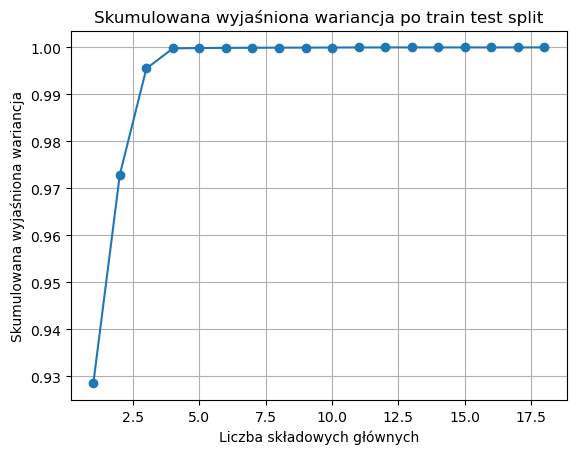

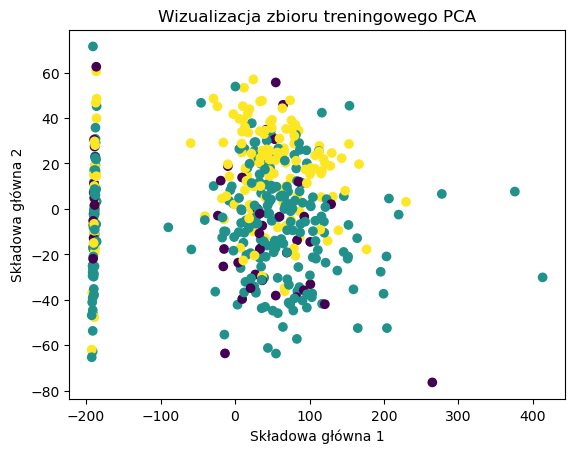

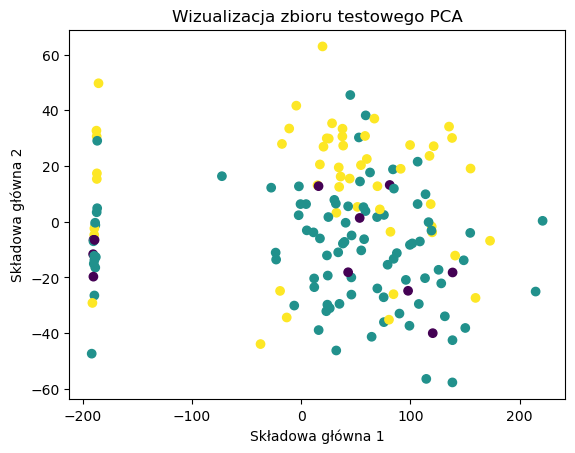

In [23]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train_scaled, y_train_slope)
X_test_pca = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_


plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Liczba składowych głównych')
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.title('Skumulowana wyjaśniona wariancja po train test split')
plt.grid(True)
plt.show()

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_slope)
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.title('Wizualizacja zbioru treningowego PCA')
plt.show()

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_slope)
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.title('Wizualizacja zbioru testowego PCA')
plt.show()

In [24]:
pca = PCA(n_components = 14)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_validate, RandomizedSearchCV


models= {
    'knn' : (
        KNeighborsClassifier(),{
        'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2],
    }
            ),
    'xgb' : (
        xgb.XGBClassifier(random_state = 42),{
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
    'reg_lambda': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
        }
    ),
    'rfc' : (RandomForestClassifier(random_state = 42),  {
        'n_estimators': [50, 100, 200, 300, 400, 500],
        'max_features': ['sqrt', 'log2', None],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy']
    }
            )
    
}


best_models = {}

for name, (model, param_dict) in models.items():
    random_search = RandomizedSearchCV(model, param_distributions = param_dict, cv = 5, random_state = 42, n_iter = 20, verbose = 2, n_jobs = -1)
    random_search.fit(X_train_pca, y_train_slope)
    best_models[name] =  random_search.best_estimator_
    print(f'Model : {name} \n')
    print(f'The best params : {random_search.best_params_} \n')
    print(f'The best score : {random_search.best_score_} \n')
    print(f'The best estimator : {random_search.best_estimator_}')
    
scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
    }

validate_results = {}
    
for name , best_model in best_models.items():
    val_score = cross_validate(best_model, X_train_pca, y_train_slope, cv = 5, scoring = scoring, n_jobs = -1, return_train_score=False)
    validate_results[name] = val_score


for name, result in validate_results.items(): 
    df_results = pd.DataFrame(result)
    print(f"\nModel: {name}")
    print(df_results.mean())
    print("-" * 30)
    

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Model : knn 

The best params : {'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'algorithm': 'kd_tree'} 

The best score : 0.6290492116579072 

The best estimator : KNeighborsClassifier(algorithm='kd_tree', n_neighbors=15, p=1)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Model : xgb 

The best params : {'subsample': 0.8, 'reg_lambda': 0.05, 'reg_alpha': 0, 'n_estimators': 50, 'min_child_weight': 7, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7} 

The best score : 0.6551361681796464 

The best estimator : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=N

In [26]:
from sklearn.metrics import accuracy_score

rfc = best_models['rfc']
rfc.fit(X_train_pca, y_train_slope)
y_pred = rfc.predict(X_test_pca)

accuracy_score(y_test_slope, y_pred)


0.7189542483660131

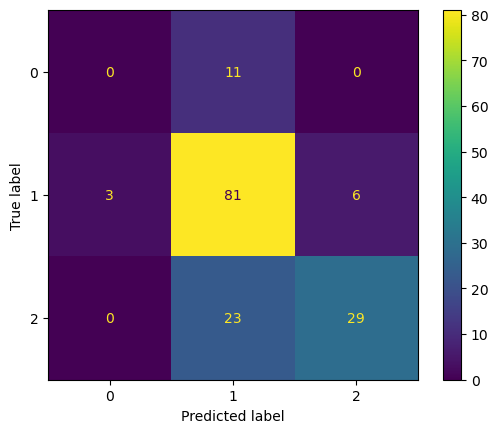

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_slope, y_pred)
unique_labels = np.unique(y_test_slope)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = unique_labels)
disp.plot()
plt.show()

In [28]:
data_to_pred = df_slope_nan
target_to_pred = df_slope_nan.pop('slope')
print(data_to_pred.shape)
print(target_to_pred.shape)

(309, 10)
(309,)


In [29]:
data_to_pred.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
493,34,Male,typical angina,140.0,156.0,False,normal,180.0,False,0.0


In [30]:
def pred(X , y):
    df_gm = pd.get_dummies(X)
    X_scaled = sc.transform(df_gm) 
    X_pca = pca.transform(X_scaled) 
    y_pred_new = rfc.predict(X_pca)  
    return y_pred_new

y_pred_new = pred(data_to_pred, target_to_pred)


In [63]:
df_slope_copy.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
540,50,Male,asymptomatic,130.0,233.0,False,normal,121.0,True,2.0,1


In [65]:
print(data_to_pred.shape)
print(y_pred_new.shape)

(309, 10)
(309,)


In [ ]:
data_to_pred.head()

In [79]:
df_new =pd.concat([df_slope_copy, data_to_pred]) 

nan_indices = df_new['slope'].isnull()

df_new.loc[nan_indices, 'slope'] = y_pred_new

df_new.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
593,54,Female,non-anginal,130.0,294.0,False,st-t abnormality,100.0,True,0.0,1


In [109]:
data = df_new.drop('slope', axis = 1)
target.sample()

459    0
Name: num, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
data_gd = pd.get_dummies(data)

X_train, X_test, y_train, y_test = train_test_split(data_gd,  target, random_state= 42, shuffle = True)



In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

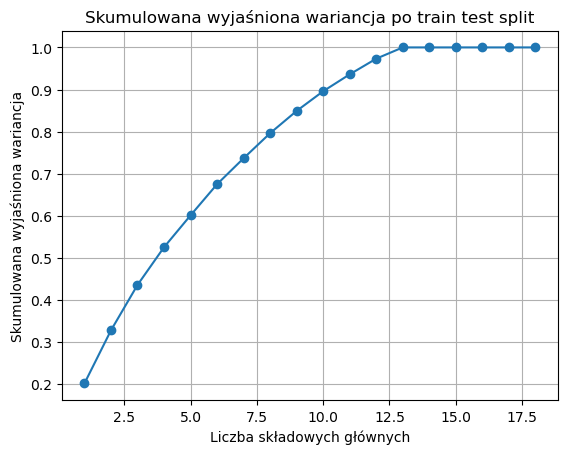

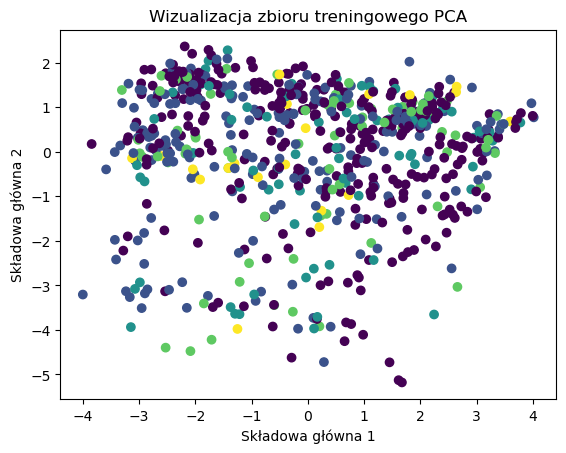

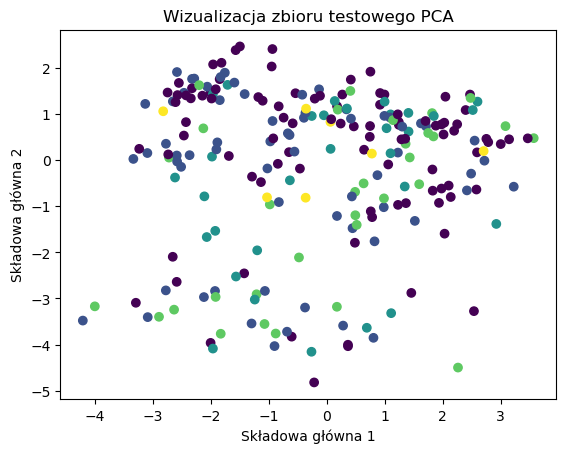

In [115]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train_scaled, y_train)
X_test_pca = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_


plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Liczba składowych głównych')
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.title('Skumulowana wyjaśniona wariancja po train test split')
plt.grid(True)
plt.show()

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.title('Wizualizacja zbioru treningowego PCA')
plt.show()

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.title('Wizualizacja zbioru testowego PCA')
plt.show()

In [117]:

models= {
    'knn' : (
        KNeighborsClassifier(),{
        'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2],
    }
            ),
    'xgb' : (
        xgb.XGBClassifier(random_state = 42),{
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
    'reg_lambda': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
        }
    ),
    'rfc' : (RandomForestClassifier(random_state = 42),  {
        'n_estimators': [50, 100, 200, 300, 400, 500],
        'max_features': ['sqrt', 'log2', None],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy']
    }
            )
    
}


best_models = {}

for name, (model, param_dict) in models.items():
    random_search = RandomizedSearchCV(model, param_distributions = param_dict, cv = 5, random_state = 42, n_iter = 20, verbose = 2, n_jobs = -1)
    random_search.fit(X_train_pca, y_train)
    best_models[name] =  random_search.best_estimator_
    print(f'Model : {name} \n')
    print(f'The best params : {random_search.best_params_} \n')
    print(f'The best score : {random_search.best_score_} \n')
    print(f'The best estimator : {random_search.best_estimator_}')
    
scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
    }

validate_results = {}
    
for name , best_model in best_models.items():
    val_score = cross_validate(best_model, X_train_pca, y_train, cv = 5, scoring = scoring, n_jobs = -1, return_train_score=False)
    validate_results[name] = val_score


for name, result in validate_results.items(): 
    df_results = pd.DataFrame(result)
    print(f"\nModel: {name}")
    print(df_results.mean())
    print("-" * 30)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Model : knn 

The best params : {'weights': 'uniform', 'p': 2, 'n_neighbors': 15, 'algorithm': 'auto'} 

The best score : 0.5057971014492754 

The best estimator : KNeighborsClassifier(n_neighbors=15)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Model : xgb 

The best params : {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alpha': 0.05, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0} 

The best score : 0.5072463768115941 

The best estimator : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.

In [52]:
from sklearn.metrics import accuracy_score

y_pred = randomized_search.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5217391304347826

In [58]:
y_pred_rf = random_search.predict(X_test_scaled)

accuracy_score(y_test, y_pred_rf)

0.5782608695652174